In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

**` A ideia desta an�lise � mostra os Pa�ses que mais consomem bebidas alc�licas e o continente com mais consulmo do mesmo.`**
**`Seguindo os pa�ses de cada continete`**

# Lendo o dataSet Drinks.csv

In [2]:
df= pd.read_csv('drinks.csv')

## Vamos agora entrar na limpeza dos dados.

In [3]:
df.isnull().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

#### Temos 23 contines nulos. Iremos trat�-losa mais para frente.

## Tratamento de Anom�lias.

AxesSubplot(0.125,0.125;0.775x0.755)


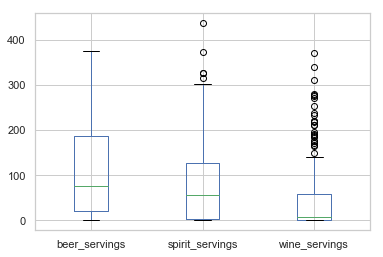

In [4]:
%matplotlib inline
print(df.boxplot(column=['beer_servings','spirit_servings','wine_servings']))
#sns.boxplot(data=[df['spirit_servings']]);


Resumo dos boxplot  nas colunas spirit_servings , wine_servings temos concentraçõeses de valores acima da média . Ou seja temos valores fora do padrão que podem interferir em nossa análise futuralmente. Sendo que na coluna wine_servings temos uma concentraçãoo maior desses valores. Iremos buscar esses valores a cima da média logo abaixo.

Vamos calcular desvio padrão 

In [5]:
desvio = np.std(df, axis=0)
desvio

beer_servings                   100.880733
spirit_servings                  88.055299
wine_servings                    79.490860
total_litres_of_pure_alcohol      3.763510
dtype: float64

**fronteira de valor acima da m�dia em duas vezes o dsvio padr�o**

In [6]:
media =np.mean(df, axis=0)
media

beer_servings                   106.160622
spirit_servings                  80.994819
wine_servings                    49.450777
total_litres_of_pure_alcohol      4.717098
dtype: float64

In [7]:
array1 = np.array(df['spirit_servings'])
array2 = np.array(df['wine_servings'])


<font color='red'><b>Alterei apenas o sinal de menor < para maior >. A condição e toda a lógica desenvolvida está correta.</b></font>

In [8]:
spirit_servings=[ x for x in array1 if (x > media.spirit_servings + 2 * desvio.spirit_servings)]
wine_servings= [ y for y in array2 if (y >  media.wine_servings + 2 * desvio.wine_servings)]

**Total e listagem de valores anomalos detectados para o atributo spirit_servings**

In [9]:
print("Total:{}, Listagem:{}".format(len(spirit_servings),spirit_servings))

Total:9, Listagem:[373, 286, 438, 302, 326, 326, 315, 293, 258]


**Total e listagem de valores anomalos detectados para o atributo wine_servings**

In [10]:
print("Total:{}, Listagem:{}".format(len(wine_servings),wine_servings))

Total:15, Listagem:[312, 221, 212, 212, 254, 278, 233, 370, 218, 237, 271, 339, 276, 280, 220]


**Plotagem de valores anomalos detectados para o atributo spirit_servings**

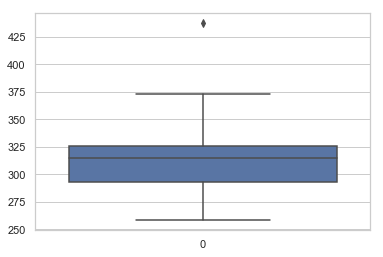

In [11]:
sns.boxplot(data=spirit_servings);

**Plotagem de valores anomalos detectados para o atributo wine_servings**

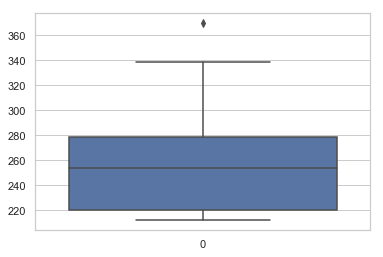

In [12]:
sns.boxplot(data=wine_servings);

**Removendo do nosso dataFrame os valores escrepantes na coluna spirit_servings**

In [43]:
spirit_servings_values = [x for x in df['spirit_servings'] if (x < media.spirit_servings + 2 * desvio.spirit_servings)]


[0, 132, 0, 138, 57, 128, 25, 179, 72, 75, 46, 176, 63, 0, 173, 84, 114, 4, 0, 41, 173, 35, 145, 2, 252, 7, 0, 1, 56, 65, 1, 122, 2, 1, 124, 192, 76, 3, 1, 254, 87, 87, 137, 154, 170, 0, 3, 81, 44, 147, 74, 4, 69, 0, 0, 194, 3, 35, 133, 151, 98, 0, 100, 117, 3, 112, 69, 0, 31, 98, 215, 61, 114, 1, 0, 3, 118, 69, 42, 97, 202, 21, 246, 22, 34, 0, 97, 0, 216, 55, 29, 152, 0, 244, 133, 15, 11, 4, 0, 1, 100, 0, 0, 31, 68, 50, 0, 189, 114, 6, 18, 1, 3, 0, 6, 88, 79, 118, 2, 5, 200, 71, 16, 0, 63, 104, 39, 117, 160, 186, 215, 67, 42, 16, 226, 122, 2, 205, 221, 18, 0, 38, 5, 1, 131, 25, 3, 12, 51, 11, 0, 76, 157, 104, 13, 178, 2, 60, 100, 35, 15, 27, 1, 2, 21, 156, 3, 22, 71, 41, 9, 237, 135, 126, 6, 158, 35, 101, 18, 100, 2, 0, 19, 18]


In [29]:
wine_servings_values = [x for x in df['wine_servings'] if (x < media.wine_servings + 2 * desvio.wine_servings)]
print(wine_servings_values)

[0, 54, 14, 45, 45, 11, 191, 5, 51, 7, 0, 36, 42, 8, 13, 0, 8, 8, 35, 16, 1, 94, 7, 0, 7, 16, 1, 4, 100, 1, 1, 172, 8, 3, 1, 9, 74, 11, 5, 113, 134, 0, 1, 3, 26, 9, 3, 1, 2, 0, 59, 0, 1, 97, 59, 1, 149, 175, 10, 28, 2, 2, 21, 1, 1, 2, 185, 78, 0, 0, 0, 0, 165, 9, 9, 16, 1, 12, 2, 1, 0, 6, 123, 62, 31, 0, 2, 0, 56, 4, 1, 0, 0, 1, 120, 0, 0, 18, 5, 18, 0, 8, 128, 10, 5, 0, 1, 8, 0, 190, 175, 1, 1, 2, 7, 129, 1, 0, 23, 18, 1, 74, 21, 1, 56, 7, 9, 18, 167, 73, 0, 32, 71, 11, 24, 0, 140, 0, 7, 127, 51, 2, 11, 116, 1, 0, 81, 112, 0, 0, 7, 2, 186, 16, 0, 1, 86, 4, 19, 5, 7, 20, 7, 32, 9, 0, 45, 5, 195, 1, 84, 8, 11, 3, 1, 0, 4, 4]


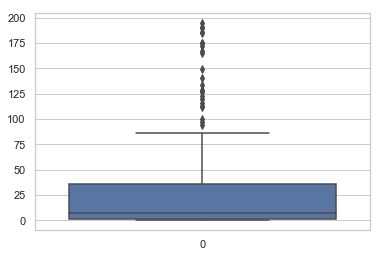

In [30]:
sns.boxplot(data=wine_servings_values)

In [38]:
media_wine_servings_value=np.median(wine_servings_values)
desvio_padrao_wine_servings_value=np.std(wine_servings_values)

In [39]:
wine_servings_values_2= [x for x in wine_servings_values if (x <media_wine_servings_value + 2 * desvio_padrao_wine_servings_value)]
print(wine_servings_values_2)

[0, 54, 14, 45, 45, 11, 5, 51, 7, 0, 36, 42, 8, 13, 0, 8, 8, 35, 16, 1, 94, 7, 0, 7, 16, 1, 4, 100, 1, 1, 8, 3, 1, 9, 74, 11, 5, 0, 1, 3, 26, 9, 3, 1, 2, 0, 59, 0, 1, 97, 59, 1, 10, 28, 2, 2, 21, 1, 1, 2, 78, 0, 0, 0, 0, 9, 9, 16, 1, 12, 2, 1, 0, 6, 62, 31, 0, 2, 0, 56, 4, 1, 0, 0, 1, 0, 0, 18, 5, 18, 0, 8, 10, 5, 0, 1, 8, 0, 1, 1, 2, 7, 1, 0, 23, 18, 1, 74, 21, 1, 56, 7, 9, 18, 73, 0, 32, 71, 11, 24, 0, 0, 7, 51, 2, 11, 1, 0, 81, 0, 0, 7, 2, 16, 0, 1, 86, 4, 19, 5, 7, 20, 7, 32, 9, 0, 45, 5, 1, 84, 8, 11, 3, 1, 0, 4, 4]


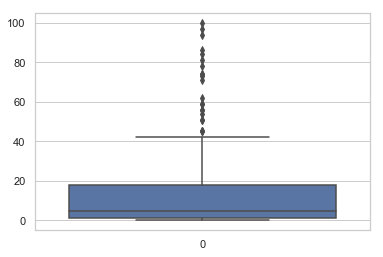

In [40]:
sns.boxplot(data=wine_servings_values_2)